# Local Age vs Host Stellar Mass

This plot will look at the prediction made in Childress 2014 figure 4.

In [2]:
from glob import glob
import datetime

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
from scipy.stats import spearmanr

## Verrify
Check to make sure stellar mass is some what related to my c paramter.

## Age v Host Mass

In [77]:
galaxy = pd.read_csv('../resources/kcorrect_stellarmass.csv',  usecols=['GAL', 'redshift', 'stellarmass'], index_col='GAL')
galaxy = galaxy[galaxy['redshift']<0.2]
galaxy

,redshift,stellarmass
GAL,,
10028,0.065329,2.959660e+10
1032,0.129755,2.856640e+10
10805,0.045363,8.579470e+09
11172,0.136222,1.522050e+10
12860,0.121708,1.971160e+10
12898,0.083581,5.865850e+09
12950,0.082657,5.773250e+09
13135,0.104671,7.216360e+10
13354,0.157625,2.170690e+10


In [41]:
age = pd.read_csv('../resources/ages_campbell.tsv', sep='\t',  skiprows=[1],
                   usecols=['# sn id', 'age'], dtype={'age': np.float64, '# sn id': np.int})
age.rename(columns={'# sn id': 'SNID'}, inplace=True)
age.set_index('SNID', inplace=True)
age

,age
SNID,
10028,6.343210
10324,3.951807
1032,6.117300
10550,2.510263
10559,5.349814
10805,4.566090
11172,5.167015
1119,2.563700
11311,4.269606


In [78]:
# data = pd.merge(galaxy, age, how='outer', on='index')
data = pd.concat([galaxy, age], axis=1)
data.dropna(inplace=True)
data

,redshift,stellarmass,age
1032,0.129755,2.856640e+10,6.117300
1371,0.119015,4.658690e+10,9.597481
1794,0.142767,6.920300e+08,3.807323
2372,0.180438,1.776030e+10,6.133763
2440,0.191126,1.826730e+10,4.090401
3087,0.165494,4.940910e+09,2.667006
3205,0.147577,2.007040e+10,3.087827
3256,0.108243,5.794120e+09,2.508225
3317,0.161011,9.537400e+09,6.903716
3592,0.086610,3.235730e+08,3.736866


### Alternative way to get ages

In [70]:
# number of samples desired
num = 50

In [71]:
# test= pd.concat([SNData, ages], axis=1)  ## ages dataframe is going away
test = galaxy.copy()
test.dropna(inplace=True)  # drop rows that don't hae both HR & ages
for i in range(num):
    test['random age {}'.format(i)] = np.nan
# test.head(5)
test

,stellarmass,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,random age 7,random age 8,...,random age 40,random age 41,random age 42,random age 43,random age 44,random age 45,random age 46,random age 47,random age 48,random age 49
GAL,,,,,,,,,,,,,,,,,,,,,
10028,2.959660e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,2.856640e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10324,1.169660e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10550,2.056190e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10559,3.176840e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10805,8.579470e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11172,1.522050e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119,3.536270e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11311,3.748190e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
dataset = 'campbell'


if dataset == 'campbell':
    files = '../resources/SN{}_campbell_chain.tsv'
if dataset == 'campbellG':
    files = '../resources/SN{}_campbellG_chain.tsv'

# for i in SNData.index.values:
for i in test.index.values:
    # So this works with only a partical dataset
    try:
        ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
                            usecols=['age'], dtype={'age': np.float64})
        # Get 10 random values of ages_
        # Use randint because it is half open: [low, high)
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
        # Unlike random_integer
        index=np.random.randint(len(ages_), size=num)
        # add the randomly collected ages to the dataframe.
        # `.loc` allows access to the `num` random age "cells"
        # `.values` takes the ages_ from a series to a array
        # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
        test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
    except FileNotFoundError:
        # if data file is not there do nothing
        print(f'Skipping SN{i} becuase {files.format(i)} is not present')

# remove rows where no age was added
# should be a result of hitting the except block.
test.dropna(inplace=True)        

print(len(test))   #should be 110
test.head(5)

306


,stellarmass,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,random age 7,random age 8,...,random age 40,random age 41,random age 42,random age 43,random age 44,random age 45,random age 46,random age 47,random age 48,random age 49
GAL,,,,,,,,,,,,,,,,,,,,,
10028,2.959660e+10,6.448781,6.018046,4.791747,6.758737,5.970286,5.454400,6.512593,5.315242,6.296301,...,5.390236,6.023184,7.337872,6.788438,6.371343,6.521394,6.385308,6.066541,6.573539,6.226277
1032,2.856640e+10,8.794570,6.387469,0.746566,5.003963,3.437009,7.833194,3.440233,11.142051,5.751102,...,8.757227,9.621344,6.814536,5.565129,8.284333,4.961712,8.064306,8.883734,6.252176,5.515810
10324,1.169660e+09,1.047502,4.526162,1.771365,3.266234,2.533941,3.934877,2.341822,4.122386,6.073492,...,3.499944,4.973220,6.007658,2.041838,5.624009,4.686651,5.284421,5.231143,3.505702,1.493299
10550,2.056190e+10,2.448560,2.020966,3.477375,1.916242,2.422202,4.019624,1.450359,1.992854,3.505544,...,1.098910,1.288328,2.163397,1.585654,2.947209,2.209841,3.664651,1.407262,3.916186,3.587753
10559,3.176840e+10,5.632810,1.656255,5.437592,6.800561,8.267728,6.215894,6.489055,5.396184,6.536194,...,6.602909,1.654908,6.899531,1.654897,2.666046,7.364447,6.648399,4.323570,5.167435,8.409793


## Make plots

First quick and dirty, than a kde

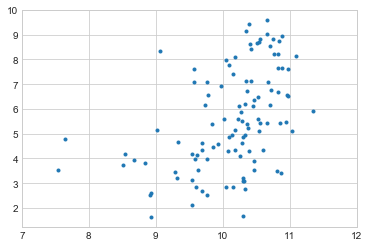

In [80]:
plt.plot(np.log10(data['stellarmass'].values), data['age'].values, '.')
plt.xlim(7,12)
plt.show()

In [93]:
# sns.jointplot(np.log10(data['stellarmass'].values), data['age'].values, kind="hex", gridsize=25,
#                   bins=None, space=0.05, xlim=(7,12),  ylim=(1,10), #ylim=(-0.75, 1.4),
#                   marginal_kws={'kde':True, 'hist':True,
#                                 'kde_kws':{"shade":True}}
#                  )
sns.jointplot(np.log10(data['stellarmass'].values), data['age'].values, kind="kde",
              stat_func=None, levels=3,
              space=0.05, xlim=(7,12),  ylim=(0,12), #ylim=(-0.75, 1.4),
#               marginal_kws={'kde':True, 'hist':True,
#                             'kde_kws':{"shade":True}}
                 ).set_axis_labels('Galaxy Stellar Mass [log(M/M$_{\odot}$)]', 
                                   'local age [Gyr]')
plt.show()

TypeError: object of type 'int' has no len()